In [1]:
import os
import math
import time
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import sklearn.ensemble as ske
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix,f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv("Datafiles.csv")

In [3]:
data

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,...,Fwd Header Length.1,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Label
0,0,0,0,0,0,0,0,54865,3,2,...,40,0,-1,1,20,0.0,0.000000,0,0,BENIGN
1,1,1,1,1,1,1,1,55054,109,1,...,20,6,256,0,20,0.0,0.000000,0,0,BENIGN
2,2,2,2,2,2,2,2,55055,52,1,...,20,6,256,0,20,0.0,0.000000,0,0,BENIGN
3,3,3,3,3,3,3,3,46236,34,1,...,20,6,329,0,20,0.0,0.000000,0,0,BENIGN
4,4,4,4,4,4,4,4,54863,3,2,...,40,0,-1,1,20,0.0,0.000000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,1048570,1048570,1048570,1048570,1048570,1048570,443,88877518,7,...,140,1548,268,6,20,155303.0,101.823376,155375,155231,BENIGN
1048571,1048571,1048571,1048571,1048571,1048571,1048571,1048571,53,30944,2,...,40,414,-1,1,20,0.0,0.000000,0,0,BENIGN
1048572,1048572,1048572,1048572,1048572,1048572,1048572,1048572,53,217,2,...,64,484,-1,1,32,0.0,0.000000,0,0,BENIGN
1048573,1048573,1048573,1048573,1048573,1048573,1048573,1048573,53,227,2,...,64,248,-1,1,32,0.0,0.000000,0,0,BENIGN


In [4]:
data[' Label'].value_counts()

BENIGN      759652
PortScan    158930
DDoS        128027
Bot           1966
Name:  Label, dtype: int64

In [5]:
data=data.iloc[:,7:]

In [6]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Header Length.1,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,40,0,-1,1,20,0.0,0.000000,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,6,256,0,20,0.0,0.000000,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,6,256,0,20,0.0,0.000000,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,6,329,0,20,0.0,0.000000,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,40,0,-1,1,20,0.0,0.000000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,443,88877518,7,10,643,1548,267,6,91.857143,120.637789,...,140,1548,268,6,20,155303.0,101.823376,155375,155231,BENIGN
1048571,53,30944,2,2,60,414,30,30,30.000000,0.000000,...,40,414,-1,1,20,0.0,0.000000,0,0,BENIGN
1048572,53,217,2,2,68,484,34,34,34.000000,0.000000,...,64,484,-1,1,32,0.0,0.000000,0,0,BENIGN
1048573,53,227,2,2,92,248,46,46,46.000000,0.000000,...,64,248,-1,1,32,0.0,0.000000,0,0,BENIGN


In [7]:
null_values_per_column = data.isnull().any()

# Print information for each column
for column, has_nulls in null_values_per_column.items():
    if has_nulls:
        print(f"Column '{column}' has null values.")
    else:
        print(f"Column '{column}' has no null values.")
        

Column ' Destination Port' has no null values.
Column ' Flow Duration' has no null values.
Column ' Total Fwd Packets' has no null values.
Column ' Total Backward Packets' has no null values.
Column 'Total Length of Fwd Packets' has no null values.
Column ' Total Length of Bwd Packets' has no null values.
Column ' Fwd Packet Length Max' has no null values.
Column ' Fwd Packet Length Min' has no null values.
Column ' Fwd Packet Length Mean' has no null values.
Column ' Fwd Packet Length Std' has no null values.
Column 'Bwd Packet Length Max' has no null values.
Column ' Bwd Packet Length Min' has no null values.
Column ' Bwd Packet Length Mean' has no null values.
Column ' Bwd Packet Length Std' has no null values.
Column 'Flow Bytes/s' has null values.
Column ' Flow Packets/s' has no null values.
Column ' Flow IAT Mean' has no null values.
Column ' Flow IAT Std' has no null values.
Column ' Flow IAT Max' has no null values.
Column ' Flow IAT Min' has no null values.
Column 'Fwd IAT Tot

In [8]:
column_datatypes = data.dtypes


for column, datatype in column_datatypes.items():
    print(f"Column '{column}' has datatype '{datatype}'.")

Column ' Destination Port' has datatype 'int64'.
Column ' Flow Duration' has datatype 'int64'.
Column ' Total Fwd Packets' has datatype 'int64'.
Column ' Total Backward Packets' has datatype 'int64'.
Column 'Total Length of Fwd Packets' has datatype 'int64'.
Column ' Total Length of Bwd Packets' has datatype 'int64'.
Column ' Fwd Packet Length Max' has datatype 'int64'.
Column ' Fwd Packet Length Min' has datatype 'int64'.
Column ' Fwd Packet Length Mean' has datatype 'float64'.
Column ' Fwd Packet Length Std' has datatype 'float64'.
Column 'Bwd Packet Length Max' has datatype 'int64'.
Column ' Bwd Packet Length Min' has datatype 'int64'.
Column ' Bwd Packet Length Mean' has datatype 'float64'.
Column ' Bwd Packet Length Std' has datatype 'float64'.
Column 'Flow Bytes/s' has datatype 'float64'.
Column ' Flow Packets/s' has datatype 'float64'.
Column ' Flow IAT Mean' has datatype 'float64'.
Column ' Flow IAT Std' has datatype 'float64'.
Column ' Flow IAT Max' has datatype 'int64'.
Colum

In [9]:
from sklearn.preprocessing import LabelEncoder
df_max_scaled = data.copy()
label_encoder = LabelEncoder()
df_max_scaled[df_max_scaled.columns[-1]] = label_encoder.fit_transform(df_max_scaled[df_max_scaled.columns[-1]])
df_max_scaled


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Header Length.1,Subflow Bwd Bytes,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,40,0,-1,1,20,0.0,0.000000,0,0,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,6,256,0,20,0.0,0.000000,0,0,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,6,256,0,20,0.0,0.000000,0,0,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,6,329,0,20,0.0,0.000000,0,0,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,40,0,-1,1,20,0.0,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,443,88877518,7,10,643,1548,267,6,91.857143,120.637789,...,140,1548,268,6,20,155303.0,101.823376,155375,155231,0
1048571,53,30944,2,2,60,414,30,30,30.000000,0.000000,...,40,414,-1,1,20,0.0,0.000000,0,0,0
1048572,53,217,2,2,68,484,34,34,34.000000,0.000000,...,64,484,-1,1,32,0.0,0.000000,0,0,0
1048573,53,227,2,2,92,248,46,46,46.000000,0.000000,...,64,248,-1,1,32,0.0,0.000000,0,0,0


In [10]:
df_max_scaled.shape

(1048575, 46)

In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming df is your DataFrame containing the dataset

# Calculate the correlation matrix
correlation_matrix = df_max_scaled.corr()

# Select the top k most correlated features with the target variable
k = 20  # You can change this value as needed
target_column = ' Label'  # Replace 'target_column' with the name of your target column
top_features = correlation_matrix.nlargest(k, target_column)[target_column].index

# Create a new DataFrame with only the top k features and the target column
df_selected_features = df_max_scaled[top_features]

# Optionally, you can also drop the target column if you only want the feature columns
# df_selected_features = df_selected_features.drop(columns=[target_column])

# Now df_selected_features contains only the selected important features and the target column
df_selected_features

,Label,Bwd Packet Length Std,Packet Length Variance,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packets/s,Packet Length Std,Max Packet Length,Average Packet Size,Packet Length Mean,Fwd IAT Std,min_seg_size_forward,Bwd Header Length,Fwd Header Length,Fwd Header Length.1,Active Min,Total Length of Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,Total Backward Packets
0,0,0.000000,0.00000,0,0.0,0.000000,0.000000,6,9.000000,6.0,0.00,20,0,40,40,0,0,0,1,0
1,0,0.000000,0.00000,6,6.0,9174.311927,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
2,0,0.000000,0.00000,6,6.0,19230.769230,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
3,0,0.000000,0.00000,6,6.0,29411.764710,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
4,0,0.000000,0.00000,0,0.0,0.000000,0.000000,6,9.000000,6.0,0.00,20,0,40,40,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,237.185253,36923.67647,636,154.8,0.112514,192.155345,636,144.529412,136.5,22872425.72,20,200,140,140,155231,1548,1548,6,10
1048571,0,0.000000,9398.70000,207,207.0,64.632885,96.946893,207,126.000000,100.8,0.00,20,64,40,40,0,414,414,1,2
1048572,0,0.000000,12979.20000,242,242.0,9216.589862,113.926292,242,146.500000,117.2,0.00,32,80,64,64,0,484,484,1,2
1048573,0,0.000000,1825.20000,124,124.0,8810.572687,42.722359,124,96.500000,77.2,0.00,32,64,64,64,0,248,248,1,2


In [12]:
df_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0    Label                        1048575 non-null  int32  
 1    Bwd Packet Length Std        1048575 non-null  float64
 2    Packet Length Variance       1048575 non-null  float64
 3   Bwd Packet Length Max         1048575 non-null  int64  
 4    Bwd Packet Length Mean       1048575 non-null  float64
 5    Bwd Packets/s                1048575 non-null  float64
 6    Packet Length Std            1048575 non-null  float64
 7    Max Packet Length            1048575 non-null  int64  
 8    Average Packet Size          1048575 non-null  float64
 9    Packet Length Mean           1048575 non-null  float64
 10   Fwd IAT Std                  1048575 non-null  float64
 11   min_seg_size_forward         1048575 non-null  int64  
 12   Bwd Header Length          

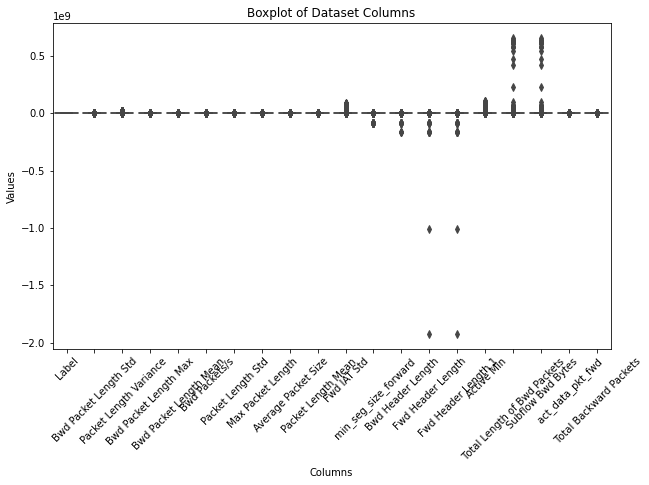

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the dataset

# Create a boxplot for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=df_selected_features)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Dataset Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [14]:
file_path = "Final_data.csv"  # Replace "your_file_path.csv" with your desired file path

# Save the DataFrame as a CSV file
df_selected_features.to_csv(file_path, index=False)

print(f"DataFrame saved as CSV file: {file_path}")

DataFrame saved as CSV file: Final_data.csv


In [31]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset

# Specify the features (X) and the target variable (y)
X = df_selected_features.drop(columns=[' Label'])  # Replace 'target_column' with the name of your target column
y = df_selected_features[' Label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X


,Bwd Packet Length Std,Packet Length Variance,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packets/s,Packet Length Std,Max Packet Length,Average Packet Size,Packet Length Mean,Fwd IAT Std,min_seg_size_forward,Bwd Header Length,Fwd Header Length,Fwd Header Length.1,Active Min,Total Length of Bwd Packets,Subflow Bwd Bytes,act_data_pkt_fwd,Total Backward Packets
0,0.000000,0.00000,0,0.0,0.000000,0.000000,6,9.000000,6.0,0.00,20,0,40,40,0,0,0,1,0
1,0.000000,0.00000,6,6.0,9174.311927,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
2,0.000000,0.00000,6,6.0,19230.769230,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
3,0.000000,0.00000,6,6.0,29411.764710,0.000000,6,9.000000,6.0,0.00,20,20,20,20,0,6,6,0,1
4,0.000000,0.00000,0,0.0,0.000000,0.000000,6,9.000000,6.0,0.00,20,0,40,40,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,237.185253,36923.67647,636,154.8,0.112514,192.155345,636,144.529412,136.5,22872425.72,20,200,140,140,155231,1548,1548,6,10
1048571,0.000000,9398.70000,207,207.0,64.632885,96.946893,207,126.000000,100.8,0.00,20,64,40,40,0,414,414,1,2
1048572,0.000000,12979.20000,242,242.0,9216.589862,113.926292,242,146.500000,117.2,0.00,32,80,64,64,0,484,484,1,2
1048573,0.000000,1825.20000,124,124.0,8810.572687,42.722359,124,96.500000,77.2,0.00,32,64,64,64,0,248,248,1,2


In [41]:
from sklearn.tree import DecisionTreeClassifier
feature_names = X_train.columns.tolist()

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [17]:
prediction = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)

In [19]:
accuracy

0.9981403333094915

In [20]:
import joblib

joblib.dump(clf,"decision_tree.pkl")

['decision_tree.pkl']

In [21]:
model_path=os.path.join('C:/Users/LAVANYA/Desktop/Main_Project/','models/dt_tree.sav')
joblib.dump(clf,model_path)

['C:/Users/LAVANYA/Desktop/Main_Project/models/dt_tree.sav']

In [38]:
# df = pd.read_csv('s_20.csv',sep=',')
# X = df.values
# X
res = [[0.000000, 0.00000, 0, 0.0, 0.000000, 0.000000, 6, 9.000000, 6.0, 0.00, 20, 0, 40, 40, 0, 0, 0, 1, 0]]
res_array = np.array(res)
reshaped_array = res_array.reshape(-1, 1)
print(reshaped_array)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 6.]
 [ 9.]
 [ 6.]
 [ 0.]
 [20.]
 [ 0.]
 [40.]
 [40.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]


In [39]:
Class=clf.predict(res)

C:\Users\LAVANYA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
from scipy.stats import mode

In [25]:
val = mode(Class)[0]

In [26]:
val=int(val)

In [27]:
val=int(val)

In [28]:
val


0

In [29]:
 d = {0: 'BENIGN', 1: 'DoS Hulk', 2: 'PortScan', 3: 'DDoS', 4: 'DoS GoldenEye', 5: 'FTP-Patator',
                     6: 'SSH-Patator', 7: 'DoS slowloris', 8: 'DoS Slowhttptest', 9: 'Bot',
                     10: 'Web Attack Brute Force',
                     11: 'Web Attack XSS', 12: 'Infiltration', 13: 'Web Attack Sql Injection', 14: 'Heartbleed'}
predicted_result = 'Predicted Result: ' + d[val]

In [30]:
predicted_result

'Predicted Result: BENIGN'